In [6]:
import pandas as pd
import pickle

In [7]:
# Parameters
start_date = "2024-09-01T00:00:00"
end_date = "2024-09-30T23:00:00"
cliente = "Montfrisa"
alias = "ALGEMES\xcd"
tarifa = "6.1 TD"
cups = "ES0021000016029493JP"
path_load_parquet = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\data\\processed\\elec\\elec_load.parquet"
path_coberturas_df = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\data\\customers\\elec\\Montfrisa\\df_coberturas.pkl"
path_master_matrix = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\data\\customers\\elec\\Montfrisa\\master_matrix_ES0021000016029493JP.pkl"
path_contract_matrix = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\data\\customers\\elec\\Montfrisa\\contract_matrix_ES0021000016029493JP.pkl"
db_elec_path = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\data\\processed\\elec\\facturas_elec.db"
template_path = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\data\\verification_project\\elec\\templates\\Template 2024.xlsx"
invoice_path_pickle = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\outputs\\verification_project\\verif\\Montfrisa\\raw\\Verificaci\xf3n Fra. 20240901_20240930 ALGEMES\xcd.pkl"
output_verif_excel = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\outputs\\verification_project\\verif\\Montfrisa\\raw\\Verificaci\xf3n Fra. 20240901_20240930 ALGEMES\xcd.xlsx"
output_verif_pdf = "c:\\Users\\mikel.perez\\0_Python_Projects - copia\\0_Python_projects_v2\\outputs\\verification_project\\verif\\Montfrisa\\pdfs\\Verificaci\xf3n Fra. 20240901_20240930 ALGEMES\xcd.pdf"


In [8]:
# Parameters
start_date = "2025-04-01T00:00:00"
end_date = "2025-04-30T23:00:00"
cliente = "Grupo Inspired"
alias = "KC SOTO VI\xd1UELAS 1"
tarifa = "6.1 TD"
cups = "ES0021000005776632EH"
path_load_parquet = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\data\\processed\\elec\\elec_load.parquet"
path_coberturas_df = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\data\\customers\\elec\\Grupo Inspired\\df_coberturas_1.pkl"
path_master_matrix = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\data\\customers\\elec\\Grupo Inspired\\master_matrix_ES0021000005776632EH.pkl"
path_contract_matrix = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\data\\customers\\elec\\Grupo Inspired\\contract_matrix_ES0021000005776632EH.pkl"
db_elec_path = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\data\\processed\\elec\\facturas_elec.db"
template_path = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\data\\verification_project\\elec\\templates\\Template 2024.xlsx"
invoice_path_pickle = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\outputs\\verification_project\\verif\\Grupo Inspired\\raw\\2025\\05. Mayo\\Verificaci\xf3n Fra. 20250401_20250430 KC SOTO VI\xd1UELAS 1.pkl"
output_verif_excel = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\outputs\\verification_project\\verif\\Grupo Inspired\\raw\\2025\\05. Mayo\\Verificaci\xf3n Fra. 20250401_20250430 KC SOTO VI\xd1UELAS 1.xlsx"
output_verif_pdf = "c:\\Users\\mikel.perez\\0_Python_projects_v2\\outputs\\verification_project\\verif\\Grupo Inspired\\pdfs\\2025\\05. Mayo\\Verificaci\xf3n Fra. 20250401_20250430 KC SOTO VI\xd1UELAS 1.pdf"


In [ ]:
from config.config_loader import Config

config = Config(config_file=config_path)

In [ ]:
from utils.logging_setup import get_logger
import time as tm

instant = tm.strftime("%Y-%m-%d_%H:%M:%S", tm.localtime())
logger = get_logger(name=f"{nb_name}")
logger.info(f"Building omie matrix on {instant}")

In [9]:
from datetime import datetime

# Assuming `start_date` and `end_date` are passed as ISO strings
start_date = datetime.fromisoformat(start_date)
end_date = datetime.fromisoformat(end_date)

logger.info("Start Date:", start_date)
logger.info("End Date:", end_date)

Start Date: 2025-04-01 00:00:00
End Date: 2025-04-30 23:00:00


In [10]:
with open(invoice_path_pickle, "rb") as pickle_file:
    invoice_dict = pickle.load(pickle_file)

df_master = pd.read_pickle(path_master_matrix)
df_coberturas = pd.read_pickle(path_coberturas_df)
df_load = pd.read_parquet(path_load_parquet)
df_contrato = pd.read_pickle(path_contract_matrix)
# apply permite generar varias columnas
# varias funciones base, una funcion por cada forma de comercializar, cada una en un diccionario
# diccionario con todas las formulas 
df_master['contract_index'].unique()
df_master['contract_id'].unique()

array([1])

In [11]:
coste_energia_fra = invoice_dict['coste_energia']
coste_reactiva_fra = invoice_dict['coste_reactiva']
coste_excesos_fra = invoice_dict['excesos_potencia']
base_imponible_fra = invoice_dict['total_bruto_iva']
coste_potencia_fra = invoice_dict['coste_potencia']
num_fra = invoice_dict['num_factura']
potencia_fra = [invoice_dict[f'potencia_p{i+1}'] for i in range (6)]
consumo_fra = [invoice_dict[f'energia_p{i+1}'] / 1000 for i in range (6)]
dto_electrointensivos_fra = invoice_dict['dto_electrointensivo']

if cliente == 'Kem One':
    potencia_fra = [1700, 1700, 1700, 1700, 1700, 2375]

logger.info(f"Power:\n{potencia_fra}")

[350.0, 350.0, 350.0, 350.0, 350.0, 350.0]

In [12]:
from verification_project.liquidation import Liquidation
from shared.dicts import contract_dict

In [13]:
Liquidation = Liquidation(
                    start_date=start_date,
                    end_date=end_date,
                    df_master=df_master,
                    df_contrato=df_contrato,
                    power_list=potencia_fra,
                    df_load=df_load,
                    df_coberturas=df_coberturas,
                        )

In [14]:
Liquidation.execute(contract_mapping=contract_dict);

1.0
0.0
0.0


In [15]:
df = Liquidation.df_verif

logger.info(f'Simulated power cost: {Liquidation.coste_potencia} €')
logger.info(f'Simulated excess cost: {Liquidation.excesos_potencia} €')
logger.info(f'Simulated energy cost: {Liquidation.coste_energia} €')
logger.info(f'Simulated electrointesivo deduction: {Liquidation.dto_electrointensivos} €')
logger.info(f'Simulated taxable base: {Liquidation.base_imponible} €')

Coste potencia: 1681.4284890410959 €
Coste excesos potencia: 0.0 €
Coste energía: 3460.9702556308866 €
Descuento electrointensivos: 0.0 €
Base imponible: 5405.1753205247205 €


In [ ]:
logger.info(f'Simulated captured commodity price: {Liquidation.captured_commodity_price_w_clicks} €')

In [12]:
logger.info(f'Simulated power cost: {Liquidation.coste_potencia} €')
logger.info(f'Simulated excess cost: {Liquidation.excesos_potencia} €')
logger.info(f'Simulated energy cost: {Liquidation.coste_energia} €')
logger.info(f'Simulated electrointesivo discount: {Liquidation.dto_electrointensivos} €')
logger.info(f'Simulated taxable base: {Liquidation.base_imponible} €')

logger.info(f'Invoice power cost: {coste_potencia_fra} €')
logger.info(f'Invoice excess cost: {coste_excesos_fra} €')
logger.info(f'Invoice energy cost: {coste_energia_fra} €')
logger.info(f'Invoice electricity dependent deduction: {dto_electrointensivos_fra} €')
logger.info(f'Invoice taxable base: {base_imponible_fra} €')


Coste potencia factura: 62.12 €
Coste excesos potencia factura: 0.0 €
Coste energía factura: 747.6 €
Descuento electrointensivos: 0.0 €
Base imponible: 851.12 €
[20.0, 20.0, 20.0, 20.0, 20.0, 20.0]
[0.0, 1.343, 0.965, 0.0, 0.0, 2.425]


In [13]:
logger.info(f'Avoided solar captured price: {Liquidation.solar_avoided_price} €')

148.9979584396609

<Axes: xlabel='datetime'>

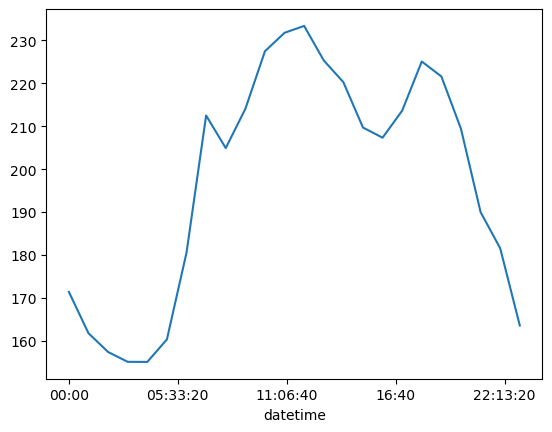

In [14]:
df.groupby(df['datetime'].dt.time)['load'].sum().plot()

In [15]:
load_period = df.groupby('periodo')['load'].sum() / 1000
load_values_dict = load_period.to_dict()

consumo_ver = [load_values_dict.get(period, 0) for period in range(1,7)]

logger.info(f'Energy consumption {sum(consumo_ver)} MWh')
logger.info(f'Energy consumption per period {(consumo_ver)}')  # Output: [0, 0, 135300.0, 104462.0, 0, 188058.0]


Energia total consumida 4.7329999991 MWh
Energia consumida por periodo [0, 1.3429999996, 0.9650000024, 0, 0, 2.4249999971]


In [16]:
from shared.dicts import ver_mapping
import utils.utils_dates as utils_dates

In [17]:
dict_ver = {
    "cliente" : cliente,
    "alias" : alias,
    "cups" : cups,
    "tarifa" : tarifa,
    "periodo" : f'{start_date.strftime("%d-%m-%Y")} - {end_date.strftime("%d-%m-%Y")}',
    "num_factura" : num_fra,
    "consumo_fra" : consumo_fra,
    "energia_fra" : coste_energia_fra,
    "potencia_fra" : coste_potencia_fra,
    "excesos_fra" : coste_excesos_fra,
    "reactiva_fra" : coste_reactiva_fra,
    "dto_electrointensivos_fra" : dto_electrointensivos_fra,
    "base_imponible_fra" : base_imponible_fra,
    "potencia_contratada" : potencia_fra,
    "consumo_ver" : consumo_ver,
    "potencia_ver" : Liquidation.coste_potencia,
    "energia_ver" : Liquidation.coste_energia,
    "excesos_ver" : Liquidation.excesos_potencia,
    "reactiva_ver" : coste_reactiva_fra,
    "dto_electrointensivos_ver" : - Liquidation.dto_electrointensivos,
    "base_imponible_ver" : Liquidation.base_imponible + coste_reactiva_fra,
    # "days" : utils_dates.days_in_month(year=year, month=month)
    }
print(dict_ver)

{'cliente': 'PR', 'alias': 'TIVOLI', 'cups': 'ES0031103666028002EF', 'tarifa': '3.0 TD', 'periodo': '01-11-2024 - 30-11-2024', 'num_factura': '9300349104', 'consumo_fra': [0.0, 1.343, 0.965, 0.0, 0.0, 2.425], 'energia_fra': 747.6, 'potencia_fra': 62.12, 'excesos_fra': 0.0, 'reactiva_fra': 0.0, 'dto_electrointensivos_fra': 0.0, 'base_imponible_fra': 851.12, 'potencia_contratada': [20.0, 20.0, 20.0, 20.0, 20.0, 20.0], 'consumo_ver': [0, 1.3429999996, 0.9650000024, 0, 0, 2.4249999971], 'potencia_ver': 62.13065737704918, 'energia_ver': 741.2826709844725, 'excesos_ver': 0.0, 'reactiva_ver': 0.0, 'dto_electrointensivos_ver': -0.0, 'base_imponible_ver': 844.4677494407954}


In [18]:
from openpyxl import load_workbook

# Load the Excel template
wb = load_workbook(template_path)

# Loop through cell mapping and populate cells in the appropriate sheets
for key, (sheet_name, start_cell) in ver_mapping.items():
    if key in dict_ver:
        ws = wb[sheet_name]  # Select the correct sheet
        value = dict_ver[key]

        # If the value is a DataFrame, write it starting from the specified cell
        if isinstance(value, pd.DataFrame):
            start_column = start_cell[0]  # Get the starting column letter
            start_row = int(start_cell[1:])  # Get the starting row number
            
            for col_index, column in enumerate(value.columns):
                for row_index, item in enumerate(value[column]):
                    cell = f"{chr(ord(start_column) + col_index)}{start_row + row_index}"
                    ws[cell] = item

        # Handle fixed-length lists (e.g., consumo_fra and potencia_contratada)
        elif isinstance(value, list):
            column = ''.join(filter(str.isalpha, start_cell))  # Extract column (e.g., "A")
            row = int(''.join(filter(str.isdigit, start_cell)))  # Extract row number (e.g., 2)

            # Write each item in the list to consecutive cells
            for i in range(6):
                cell_address = f"{column}{row + i}"
                ws[cell_address] = value[i] if i < len(value) else None
        else:
            ws[start_cell] = value

# Save the updated workbook to a new file
wb.save(output_verif_excel)

Data has been saved to c:\Users\mikel.perez\0_Python_Projects - copia\0_Python_projects_v2\outputs\verification_project\verif\PR\raw\2024\12. Diciembre\Verificación Fra. 20241101_20241130 TIVOLI.xlsx with the original formatting intact.


In [19]:
from utils.utils_var import export_excel_range_to_pdf

excel_file = output_verif_excel
output_pdf = output_verif_pdf
sheet = "Ficha"
cell_range = "B1:I61"

export_excel_range_to_pdf(excel_file, output_verif_pdf, sheet, cell_range)


Exported range B1:I61 from Ficha to c:\Users\mikel.perez\0_Python_Projects - copia\0_Python_projects_v2\outputs\verification_project\verif\PR\pdfs\2024\12. Diciembre\Verificación Fra. 20241101_20241130 TIVOLI.pdf
